In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
d=pd.read_csv("Postures.csv")
d.head(5)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [3]:
d1=d.copy

In [4]:
d.replace('?',np.nan,inplace=True)  #REPLACING THE '?' VALUE BY Nan value

In [5]:
d.Class=d.Class.astype("int")

In [6]:
d.X3=d.Y3.astype(float)
d.Y3=d.Y3.astype(float)
d.Z3=d.Z3.astype(float)
d.X4=d.X4.astype(float)
d.Y4=d.Y4.astype(float)
d.Z4=d.Z4.astype(float)
d.X5=d.X5.astype(float)
d.Y5=d.Y5.astype(float)
d.Z5=d.Z5.astype(float)
d.X6=d.X6.astype(float)
d.Y6=d.Y6.astype(float)
d.Z6=d.Z6.astype(float)

# The above columns will be considered for the model. They do have missing values but it is not more 50%

In [7]:
d.drop(["User",'X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'],axis=1,inplace=True)

## The above columns are dropped cuz they have more than 50% missing values. There are columns that have 98% missing values in them. They are absolutely useless for imputation. So we will drop them all. 

In [8]:
df=d[d.Class!=0]
df.head(4)

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-73.684130,59.188576,10.678936,-71.297781,NaN,NaN,NaN,NaN,NaN,NaN
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-70.703991,61.587452,11.779919,-68.827418,NaN,NaN,NaN,NaN,NaN,NaN
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-71.138344,61.686427,11.793440,-68.889316,NaN,NaN,NaN,NaN,NaN,NaN
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-68.956425,77.387225,42.717833,-72.015146,NaN,NaN,NaN,NaN,NaN,NaN


## We will be using fast_knn algorithm for multiple imputation.

In [9]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(df.values,k=30)

In [10]:
df.head(4)

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-73.684130,59.188576,10.678936,-71.297781,NaN,NaN,NaN,NaN,NaN,NaN
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-70.703991,61.587452,11.779919,-68.827418,NaN,NaN,NaN,NaN,NaN,NaN
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-71.138344,61.686427,11.793440,-68.889316,NaN,NaN,NaN,NaN,NaN,NaN
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-68.956425,77.387225,42.717833,-72.015146,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
imputed_training

array([[  1.        ,  54.26387995,  71.46677614, ...,  45.67769864,
         83.73231332, -26.63923772],
       [  1.        ,  56.52755845,  72.26660863, ...,  45.67769864,
         83.73231332, -26.63923772],
       [  1.        ,  55.84992755,  72.46906399, ...,  45.67769864,
         83.73231332, -26.63923772],
       ...,
       [  5.        ,  54.1515399 , 129.2695021 , ...,  -1.12573832,
        122.61402681, -46.79605415],
       [  5.        ,  27.91531134, 108.00739009, ...,  54.00996168,
        129.4778791 , -43.96782011],
       [  5.        ,  27.89870542, 108.09287656, ..., -22.31602919,
        104.12467743, -54.34407868]])

In [12]:
imputed_training1=imputed_training.copy()

In [13]:
pd.DataFrame(imputed_training)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-73.684130,59.188576,10.678936,-71.297781,47.042778,81.394937,-30.270370,45.677699,83.732313,-26.639238
1,1.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-70.703991,61.587452,11.779919,-68.827418,47.398053,81.279280,-30.784864,45.677699,83.732313,-26.639238
2,1.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-71.138344,61.686427,11.793440,-68.889316,47.403021,81.277663,-30.792058,45.677699,83.732313,-26.639238
3,1.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-68.956425,77.387225,42.717833,-72.015146,46.042202,80.513606,-33.079525,45.677699,83.732313,-26.639238
4,1.0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,...,-72.444650,61.275402,10.841109,-69.279906,47.042778,81.394937,-30.270370,45.677699,83.732313,-26.639238
5,1.0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747443,77.078512,42.548245,-72.485489,...,-71.909938,61.856847,10.851973,-68.853752,47.042778,81.394937,-30.270370,45.677699,83.732313,-26.639238
6,1.0,34.522824,81.457317,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,-71.642074,...,-68.958796,76.954507,42.734639,-72.500619,46.652383,80.985894,-31.295621,45.677699,83.732313,-26.639238
7,1.0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,-71.834003,...,-72.630146,48.406087,80.419506,-31.993556,47.042778,81.394937,-30.270370,45.677699,83.732313,-26.639238
8,1.0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,-72.122161,...,-72.261479,55.609708,72.074196,-63.188466,47.042778,81.394937,-30.270370,45.677699,83.732313,-26.639238
9,1.0,61.436613,10.992838,-69.354632,32.514926,81.082434,-57.074702,87.074330,68.478813,-71.493019,...,-72.450077,55.769417,72.120275,-62.950339,47.042778,81.394937,-30.270370,45.677699,83.732313,-26.639238


In [14]:
a=pd.DataFrame(imputed_training)

In [15]:
X=a.drop(0,axis=1)
y=a[0]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
rfc=RandomForestClassifier(random_state=2).fit(X_train,y_train)
predict=rfc.predict(X_test)
print('Train Score:',rfc.score(X_train,y_train))
print('Test Score:',rfc.score(X_test,y_test))
print('Accuracy Score',accuracy_score(y_test,predict))
print('Cohen Kappa Score',cohen_kappa_score(y_test,predict))  # applying randomforest we get 0.79 accuracy score
print('Matthews Score',matthews_corrcoef(y_test,predict))

Train Score: 0.999268283759558
Test Score: 0.9545008323018481
Accuracy Score 0.9545008323018481
Cohen Kappa Score 0.9430988975568804
Matthews Score 0.9431193332119677


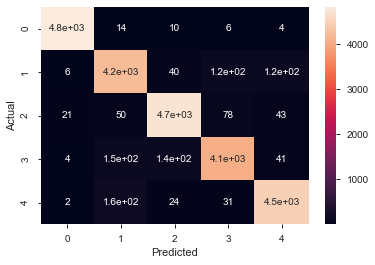

In [18]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
print(classification_report(y_test,predict)) 

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      4869
         2.0       0.92      0.94      0.93      4515
         3.0       0.96      0.96      0.96      4921
         4.0       0.95      0.92      0.94      4411
         5.0       0.95      0.95      0.95      4713

    accuracy                           0.95     23429
   macro avg       0.95      0.95      0.95     23429
weighted avg       0.95      0.95      0.95     23429

